# Unit 5 - Financial Planning

In [87]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [88]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [89]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [90]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [91]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_response = requests.get(btc_url).json()
btc_price = btc_response["data"]["1"]["quotes"]["CAD"]["price"]
# Fetch current ETH price
# YOUR CODE HERE!
eth_response = requests.get(eth_url).json()
eth_price = eth_response["data"]["1027"]["quotes"]["CAD"]["price"]
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $49417.88
The current value of your 5.3 ETH is $15108.15


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [92]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [93]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
# YOUR CODE HERE!
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2')

In [99]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()
# Set the tickers
# YOUR CODE HERE!
tickers = ['AGG', 'SPY']
# Set timeframe to "1Day" for Alpaca API
# YOUR CODE HERE!
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_ticker = api.get_bars(
    tickers,
    timeframe, 
    start = today,
    end = today
).df
# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
df_agg = df_ticker.loc[df_ticker['symbol'] == 'AGG']
df_spy = df_ticker.loc[df_ticker['symbol'] == 'SPY']
# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_combined = pd.concat([df_agg, df_spy], axis=1, join='inner')
# Display combined DF
df_combined

,open,high,low,close,volume,trade_count,vwap,symbol,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,,,,,,,,,
2020-08-07 04:00:00+00:00,119.66,119.73,119.395,119.43,5559066,15246,119.475306,AGG,333.28,334.88,332.3,334.57,57282821,350100,333.800372,SPY


In [101]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = df_ticker.loc[df_ticker["symbol"] == "AGG", "close"].values[0]
spy_close_price = df_ticker.loc[df_ticker["symbol"] == "SPY", "close"].values[0]
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $119.43
Current SPY closing price: $334.57


In [102]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $16728.50
The current value of your 200 AGG shares is $23886.00


### Savings Health Analysis

In [103]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000
# Consolidate financial assets data
# YOUR CODE HERE!
data = {'amount': [my_btc_value + my_eth_value, my_agg_value + my_spy_value]}
# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame(data, index=['crypto', 'shares'])
# Display savings DataFrame
display(df_savings)

,amount
crypto,64526.035717
shares,40614.500000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

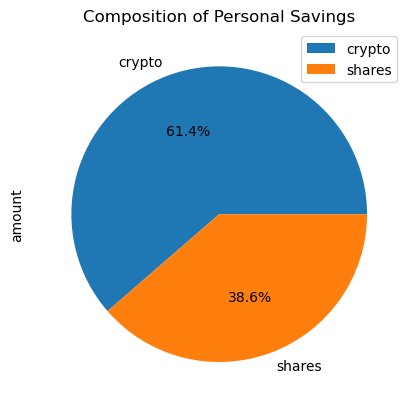

In [108]:
# Plot savings pie chart
# YOUR CODE HERE!
# Plot savings pie chart with percentage labels
df_savings.plot.pie(
    y = 'amount',
    x = 'shares',
    title = 'Composition of Personal Savings',
    autopct = '%.1f%%'
)

In [109]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = df_savings['amount'].sum()
# Validate saving health
# YOUR CODE HERE!
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations! You have reached your financial goal.")
else:
    print(f"You are ${(emergency_fund - total_savings):0.2f} away from reaching your emergency fund goal.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [110]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [111]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
data = api.get_bars(
    ['SPY', 'AGG'],
    '1Day',
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
spy_data = data[data['symbol'] == 'SPY'][['close']]
agg_data = data[data['symbol'] == 'AGG'][['close']]
# Rename the columns
spy_data.columns = ['SPY']
agg_data.columns = ['AGG']
# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_stock_data = pd.concat([spy_data, agg_data], axis=1)
# Create a multi-level column index for df_stock_data
df_stock_data.columns = pd.MultiIndex.from_product([df_stock_data.columns, ['close']])
# Display sample data
df_stock_data.head()

,SPY,AGG
,close,close
timestamp,,
2015-12-01 05:00:00+00:00,210.680,108.820
2015-12-02 05:00:00+00:00,208.529,108.685
2015-12-03 05:00:00+00:00,205.610,107.890
2015-12-04 05:00:00+00:00,209.620,108.240
2015-12-07 05:00:00+00:00,208.350,108.400


In [112]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
num_sims = 500
MC_30_year = MCSimulation(
    portfolio_data=df_stock_data,
    weights=[0.4, 0.6],
    num_simulation=num_sims,
    num_trading_days=252 * 30
)

In [113]:
# Printing the simulation input data
# YOUR CODE HERE!
print(MC_30_year.portfolio_data)

                               SPY                   AGG             
                             close daily_return    close daily_return
timestamp                                                            
2015-12-01 05:00:00+00:00  210.680          NaN  108.820          NaN
2015-12-02 05:00:00+00:00  208.529    -0.010210  108.685    -0.001241
2015-12-03 05:00:00+00:00  205.610    -0.013998  107.890    -0.007315
2015-12-04 05:00:00+00:00  209.620     0.019503  108.240     0.003244
2015-12-07 05:00:00+00:00  208.350    -0.006059  108.400     0.001478
...                            ...          ...      ...          ...
2020-08-03 04:00:00+00:00  328.670     0.006955  119.400    -0.001338
2020-08-04 04:00:00+00:00  330.000     0.004047  119.630     0.001926
2020-08-05 04:00:00+00:00  332.030     0.006152  119.400    -0.001923
2020-08-06 04:00:00+00:00  334.320     0.006897  119.570     0.001424
2020-08-07 04:00:00+00:00  334.570     0.000748  119.430    -0.001171

[1180 rows x 4 colu

In [61]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_30_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/hiddenciphers/gitrepo/homework/USYD-VIRT-FIN-PT-03-2023-U-LOLC/05-APIs/Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998369,0.993520,0.997601,0.998547,0.992585,1.002875,0.994997,0.998345,1.001550,1.006783,...,0.996305,1.004721,1.004444,0.991315,0.991874,0.997791,1.004058,0.991882,0.993804,1.002573
2,0.995850,0.992072,0.990920,0.997206,0.996773,0.998281,0.991120,1.000470,0.993914,1.003572,...,0.997482,1.015144,1.004544,1.000290,0.990307,0.987490,1.008571,0.983628,0.979427,1.009088
3,0.996991,0.988865,0.989257,1.001875,0.997453,0.998723,0.983962,1.004348,0.998332,0.998182,...,0.995793,1.008821,0.999042,0.998653,0.991334,0.980420,1.012535,0.984067,0.988339,1.018068
4,0.994247,0.991483,0.986132,1.005035,1.000915,1.001143,0.990787,1.006250,0.998026,0.994883,...,1.001374,1.012200,1.005019,1.005413,1.000806,0.972960,1.014028,0.980862,0.987562,1.019863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.307737,5.999991,6.729333,11.830210,5.863519,3.001478,2.742144,3.404323,3.267781,6.542993,...,6.398938,7.799113,6.218666,5.847611,12.496138,2.763642,5.445191,4.625068,9.556389,4.067239
7557,3.318079,5.952456,6.673890,11.763074,5.904257,3.006850,2.742076,3.407542,3.250590,6.460973,...,6.369241,7.769550,6.257286,5.827670,12.568322,2.758102,5.475160,4.625012,9.503746,4.045937
7558,3.322569,5.984715,6.648564,11.762583,5.865711,3.004413,2.723647,3.432008,3.260538,6.441694,...,6.359356,7.767188,6.246295,5.809569,12.471358,2.736411,5.457889,4.600571,9.443279,4.008420
7559,3.310480,5.946244,6.684198,11.800974,5.882721,2.968217,2.719080,3.418579,3.255216,6.473395,...,6.422283,7.772937,6.181412,5.857624,12.412229,2.738293,5.463063,4.560232,9.469383,3.988650


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

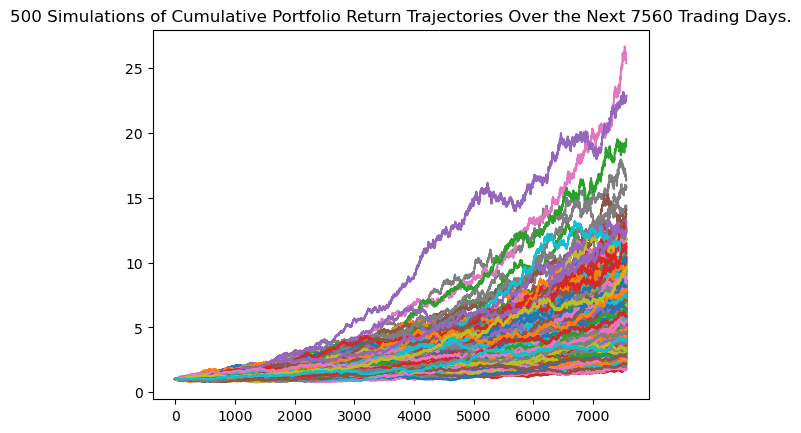

In [62]:
# Plot simulation outcomes
# YOUR CODE HERE!
MC_30_year.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

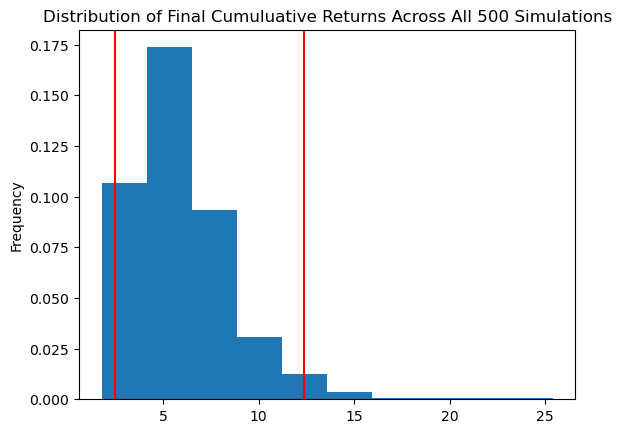

In [63]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
MC_30_year.plot_distribution()

### Retirement Analysis

In [64]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_30_year = MC_30_year.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(tbl_30_year)

count           500.000000
mean              5.987546
std               2.756878
min               1.777489
25%               4.130570
50%               5.526694
75%               7.144007
max              25.381929
95% CI Lower      2.484080
95% CI Upper     12.393122
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [69]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 20000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(tbl_30_year['95% CI Lower'] * initial_investment, 2)
ci_upper = round(tbl_30_year['95% CI Upper'] * initial_investment, 2)
# Print results
# YOUR CODE HERE!
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $49681.6 and $247862.43


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [70]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 20000 * 1.5
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(tbl_30_year['95% CI Lower'] * initial_investment, 2)
ci_upper = round(tbl_30_year['95% CI Upper'] * initial_investment, 2)
# Print results
# YOUR CODE HERE!
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $74522.41 and $371793.65


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [71]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
num_trading_days_5_years = 252 * 5
num_sims = 500
MC_five_years = MCSimulation(
    portfolio_data=df_stock_data,
    weights=[0.4, 0.6],
    num_simulation=num_sims,
    num_trading_days=num_trading_days_5_years
)

In [72]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_five_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.


/Users/hiddenciphers/gitrepo/homework/USYD-VIRT-FIN-PT-03-2023-U-LOLC/05-APIs/Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999102,0.999408,0.999372,0.993740,0.995519,1.000159,1.005582,0.995518,1.001721,0.994701,...,1.011617,1.003922,0.997230,0.993519,0.997493,1.000091,1.001009,1.002586,1.000874,0.994086
2,1.005717,1.002609,0.999032,1.001624,0.998684,1.007994,1.006964,1.000808,1.003568,0.990478,...,1.005631,1.008911,1.000744,0.996776,0.989019,0.999920,1.002357,0.999992,0.998658,0.992151
3,1.005312,1.004095,1.001715,1.002658,1.002074,1.005835,1.003207,1.008723,0.998245,0.985840,...,1.000178,1.013355,0.997684,0.999621,0.979902,1.001495,1.004026,0.998547,0.999965,0.990091
4,1.002286,1.011216,0.999626,1.008295,1.009834,1.008513,1.001496,1.005019,1.000377,0.983508,...,0.995540,1.011414,0.995076,1.004526,0.979943,0.993443,0.999664,1.004730,1.002324,0.989089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.080228,0.993691,0.958105,1.594030,1.071754,1.066785,1.279670,1.686325,1.110620,1.151751,...,1.425671,1.480256,1.042392,1.487478,1.282729,1.436748,1.321287,1.685151,1.433321,1.057279
1257,1.079215,0.998048,0.960070,1.593064,1.066497,1.058851,1.276347,1.681748,1.104835,1.143289,...,1.424576,1.490621,1.044314,1.488099,1.277827,1.426002,1.323599,1.692480,1.439627,1.050332
1258,1.084345,0.992706,0.966068,1.586336,1.067314,1.064591,1.282808,1.681835,1.101020,1.144045,...,1.413929,1.483947,1.053034,1.504327,1.277426,1.438276,1.316839,1.692296,1.432186,1.049521
1259,1.077377,0.995341,0.965922,1.586916,1.067922,1.066284,1.270854,1.682872,1.097056,1.150091,...,1.404310,1.484084,1.053561,1.516587,1.271512,1.437033,1.324096,1.686414,1.436474,1.041648


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

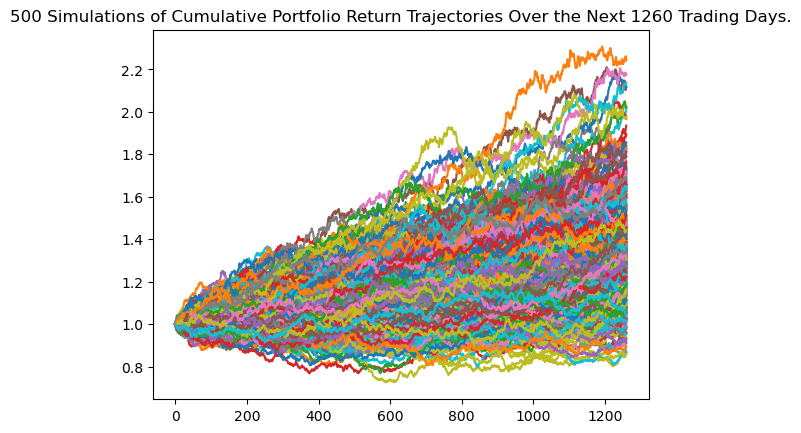

In [73]:
# Plot simulation outcomes
# YOUR CODE HERE!
MC_five_years.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

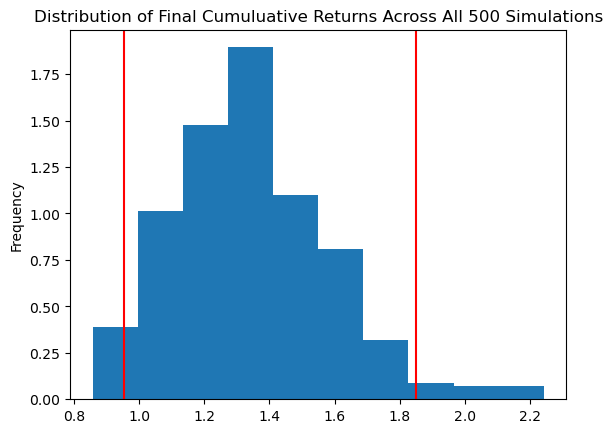

In [74]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
MC_five_years.plot_distribution()

In [78]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
summary_stats_five = MC_five_years.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(summary_stats_five)

count           500.000000
mean              1.339631
std               0.239446
min               0.858120
25%               1.174473
50%               1.320687
75%               1.469611
max               2.241133
95% CI Lower      0.954241
95% CI Upper      1.848438
Name: 1260, dtype: float64


In [79]:
# Set initial investment
# YOUR CODE HERE!
initial_investment_five_years = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(summary_stats_five[8] * initial_investment_five_years, 2)
ci_upper_five = round(summary_stats_five[9] * initial_investment_five_years, 2)
# Print results
# YOUR CODE HERE!
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $57254.43 and $110906.3


### Ten Years Retirement Option

In [81]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_even_dist_ten = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.60, 0.40],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [82]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_even_dist_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/hiddenciphers/gitrepo/homework/USYD-VIRT-FIN-PT-03-2023-U-LOLC/05-APIs/Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.010987,0.999081,0.994947,1.007620,0.983527,1.003243,1.000049,0.999775,0.991465,1.011948,...,0.991983,0.990729,1.011454,0.992860,1.012760,0.993875,0.992956,0.998313,1.004924,1.008610
2,1.008987,0.996884,0.989383,1.005011,0.980837,0.988784,0.988670,0.989372,0.992897,1.006760,...,0.999482,0.986234,1.015792,0.999396,1.012444,0.986105,0.994738,1.001887,1.005284,1.011105
3,1.012795,0.994066,0.996716,1.010123,0.972810,0.992449,0.992152,0.987909,0.981835,1.009205,...,1.009706,0.995792,1.027585,0.993208,1.008552,0.977957,0.988315,1.002548,0.998536,1.000688
4,0.997930,1.006817,1.004990,1.013372,0.977783,0.989956,0.975670,0.984324,0.986520,1.009302,...,1.011259,0.999950,1.030273,0.993639,0.995766,0.977250,0.990036,1.005769,0.995417,0.999803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.825119,0.941965,1.572558,1.947807,0.856067,1.417260,2.191975,2.946955,1.876485,1.916103,...,1.480487,2.231342,2.098292,2.183678,2.773567,3.532782,3.380261,1.974621,2.280954,1.666570
2517,1.843911,0.941283,1.578402,1.942262,0.862717,1.403281,2.170827,2.956924,1.890710,1.917647,...,1.498621,2.234252,2.067572,2.167912,2.767858,3.521569,3.378351,1.974368,2.293494,1.679309
2518,1.846689,0.943137,1.588440,1.948114,0.855940,1.400839,2.146496,2.984698,1.879902,1.929622,...,1.519203,2.226208,2.084590,2.177349,2.781771,3.539898,3.409541,1.944011,2.294551,1.667077
2519,1.827919,0.933904,1.594150,1.935173,0.857524,1.409283,2.143377,2.995509,1.867189,1.931835,...,1.532148,2.228032,2.069274,2.168661,2.775598,3.556149,3.363712,1.939916,2.291094,1.661781


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

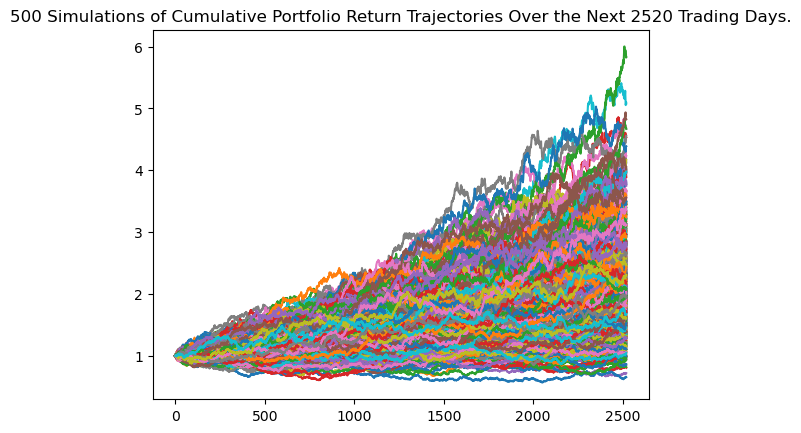

In [83]:
# Plot simulation outcomes
# YOUR CODE HERE!
MC_even_dist_ten.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

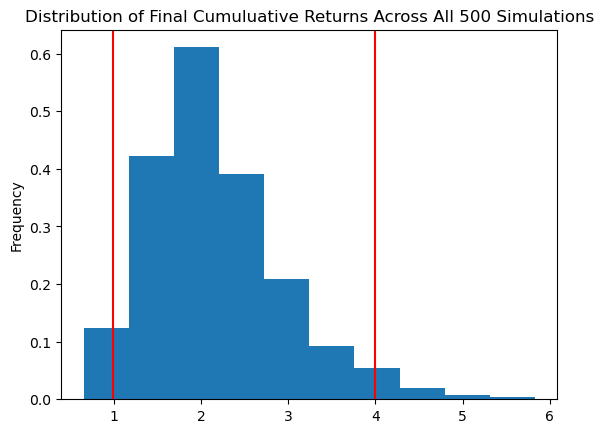

In [84]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
MC_even_dist_ten.plot_distribution()

In [85]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
even_tbl_ten = MC_even_dist_ten.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(even_tbl_ten)

count           500.000000
mean              2.161261
std               0.781582
min               0.655829
25%               1.604468
50%               2.035972
75%               2.577421
max               5.828007
95% CI Lower      0.991335
95% CI Upper      3.999808
Name: 2520, dtype: float64


In [86]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(even_tbl_ten[8]*initial_investment,2)
ci_upper_ten = round(even_tbl_ten[9]*initial_investment,2)
# Print results
# YOUR CODE HERE!
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $59480.07 and $239988.49
